<a href="https://colab.research.google.com/github/NagamallaVinay/Task-6/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 6: K-Nearest Neighbors (KNN) Classification**

**Objective**: Understand and implement KNN for classification problems.

 **Tools**:  Scikit-learn, Pandas, Matplotlib

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap

plt.style.use('fivethirtyeight')

In [4]:
#Load the Data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Iris.csv')
print("Iris dataset loaded successfully.\n")

Saving Iris.csv to Iris.csv
Iris dataset loaded successfully.



**Explore the Dataset**

In [5]:
print("First 5 rows of the Iris dataset:")
print(df.head())

# For summary of dataframe
df.info()

# Check for any missing values
print(df.isnull().sum())

# Dropping Id column as it is not a feature
df = df.drop('Id', axis=1)

First 5 rows of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory u

# **Step 1: Choose a classification dataset and normalize features.**
Normalizing the features using StandardScaler.

In [6]:

# Define features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features have been normalized. Training data shape:", X_train_scaled.shape)

Features have been normalized. Training data shape: (120, 4)


# **Step 2: Use KNeighborsClassifier from sklearn.**

We will import KNeighborsClassifier, create an instance of it, and train it on our preprocessed training data. We'll start with a common value for K, such as K=5.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier instance with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

print("KNeighborsClassifier model trained with K=5.")

KNeighborsClassifier model trained with K=5.


# **Step 3: Experiment with different values of K.**
To find the optimal value for K, we'll train and test the model on a range of K values and plot the error rate. This helps us visualize the "elbow point," which indicates a good balance between bias and variance.

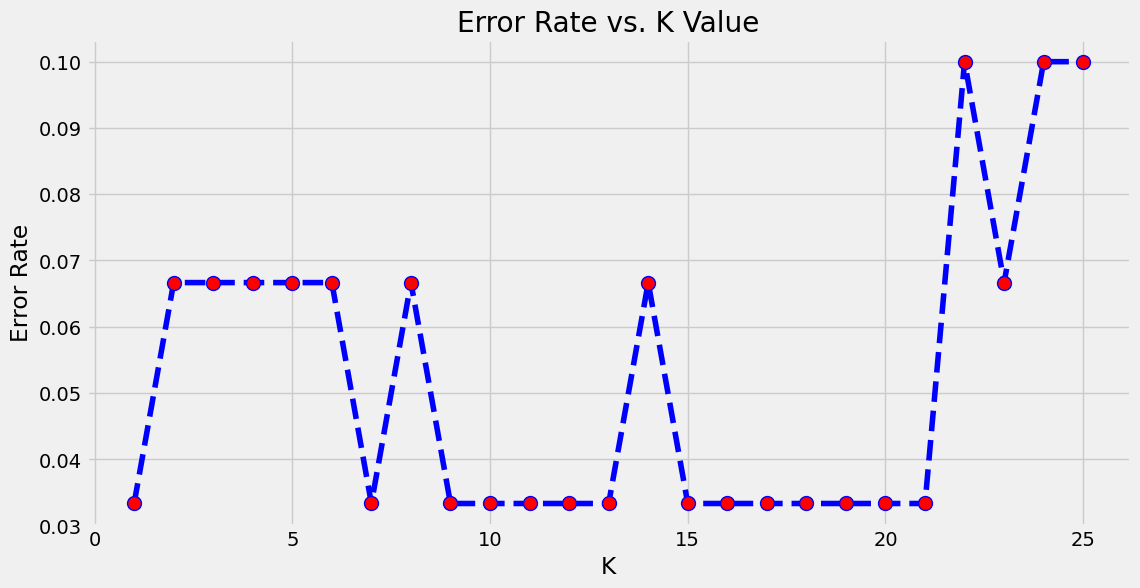

In [8]:
# Find the optimal value of K
error_rate = []
k_range = range(1, 26)

for i in k_range:
    knn_test = KNeighborsClassifier(n_neighbors=i)
    knn_test.fit(X_train_scaled, y_train)
    y_pred_i = knn_test.predict(X_test_scaled)
    error_rate.append(np.mean(y_pred_i != y_test))

# Plot the error rate vs. K value
plt.figure(figsize=(12, 6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# **Step 4: Evaluate model using accuracy, confusion matrix.**
Using the model trained with our chosen K (K=5), we'll make predictions on the test set

And let's valuate its performance using accuracy score and a confusion matrix.

Model Accuracy (K=5): 0.93



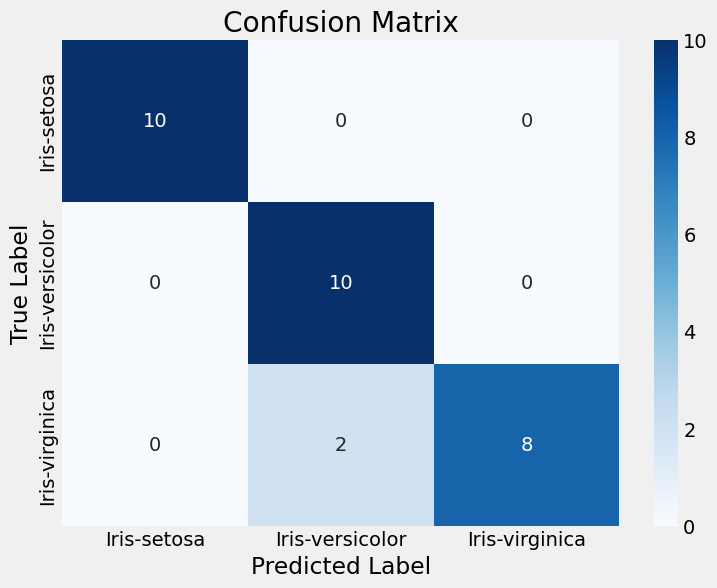


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [9]:
# Make predictions on the test set using the model from Step 2 (K=5)
y_pred = knn.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (K=5): {accuracy:.2f}\n")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# **Step 5: Visualize decision boundaries.**
To understand how the model separates the classes, we will visualize its decision boundaries.

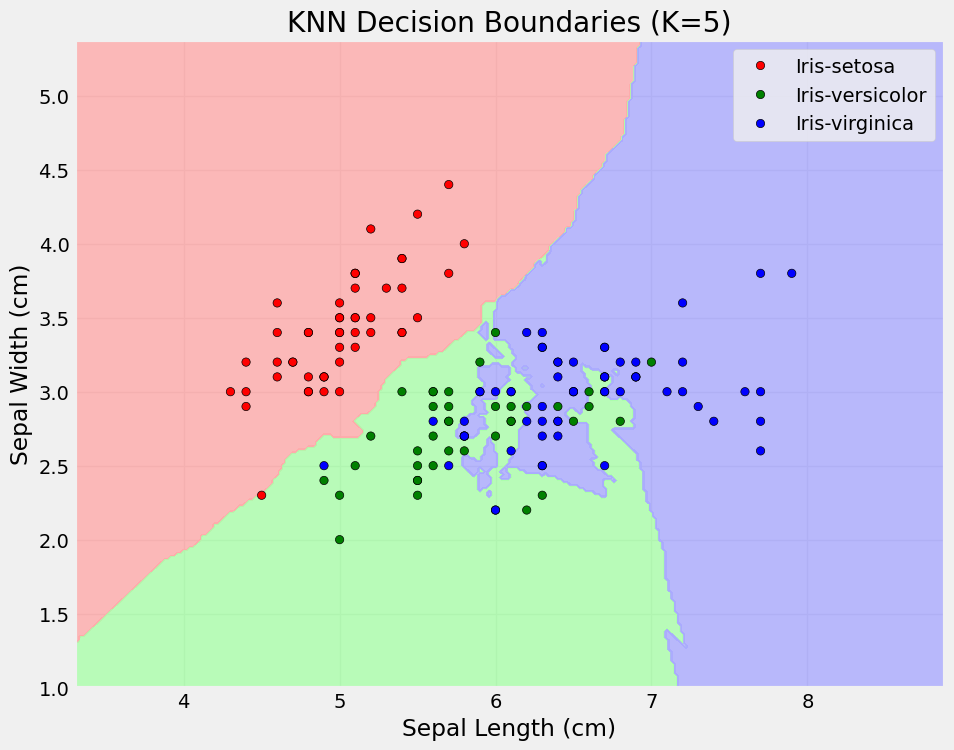

In [10]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Select two features for visualization
X_vis = df[['SepalLengthCm', 'SepalWidthCm']].values
y_vis = df['Species']

# Encode string labels to numbers for plotting
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)

# Re-train a KNN model on the two features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis_encoded)

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=df['Species'],
                palette=['red', 'green', 'blue'], alpha=1.0, edgecolor="black")
plt.title("KNN Decision Boundaries (K=5)")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()